## Observations and Insights

## Dependencies and starter code

In [ ]:
# Observations:
# Ramicane and Capomulin are the most effective drug for it's purposes, 
# though that could be because they had the most trials.
# The heavier the mouse the larger the tumor.
# The male and female chart is pretty has no correlation. It would be more usefull to see the 
# male and female distribution per drug.

In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
mouse_data_complete.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_drug = mouse_data_complete.groupby(["Drug Regimen"])
mean_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].mean(), 2)).rename(columns={"Tumor Volume (mm3)" : "Mean"})
median_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].median(), 2)).rename(columns={"Tumor Volume (mm3)" : "Median"})
variance_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].var(), 2)).rename(columns={"Tumor Volume (mm3)" : "Variance"})
std_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].std(), 2)).rename(columns={"Tumor Volume (mm3)" : "Standard Deviation"})
sem_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].sem(), 2)).rename(columns={"Tumor Volume (mm3)" : "SEM"})
data = [mean_drug, median_drug, variance_drug, std_drug, sem_drug]
df_merged = pd.concat(data, join='outer', axis=1)
df_merged


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

<IPython.core.display.Javascript object>


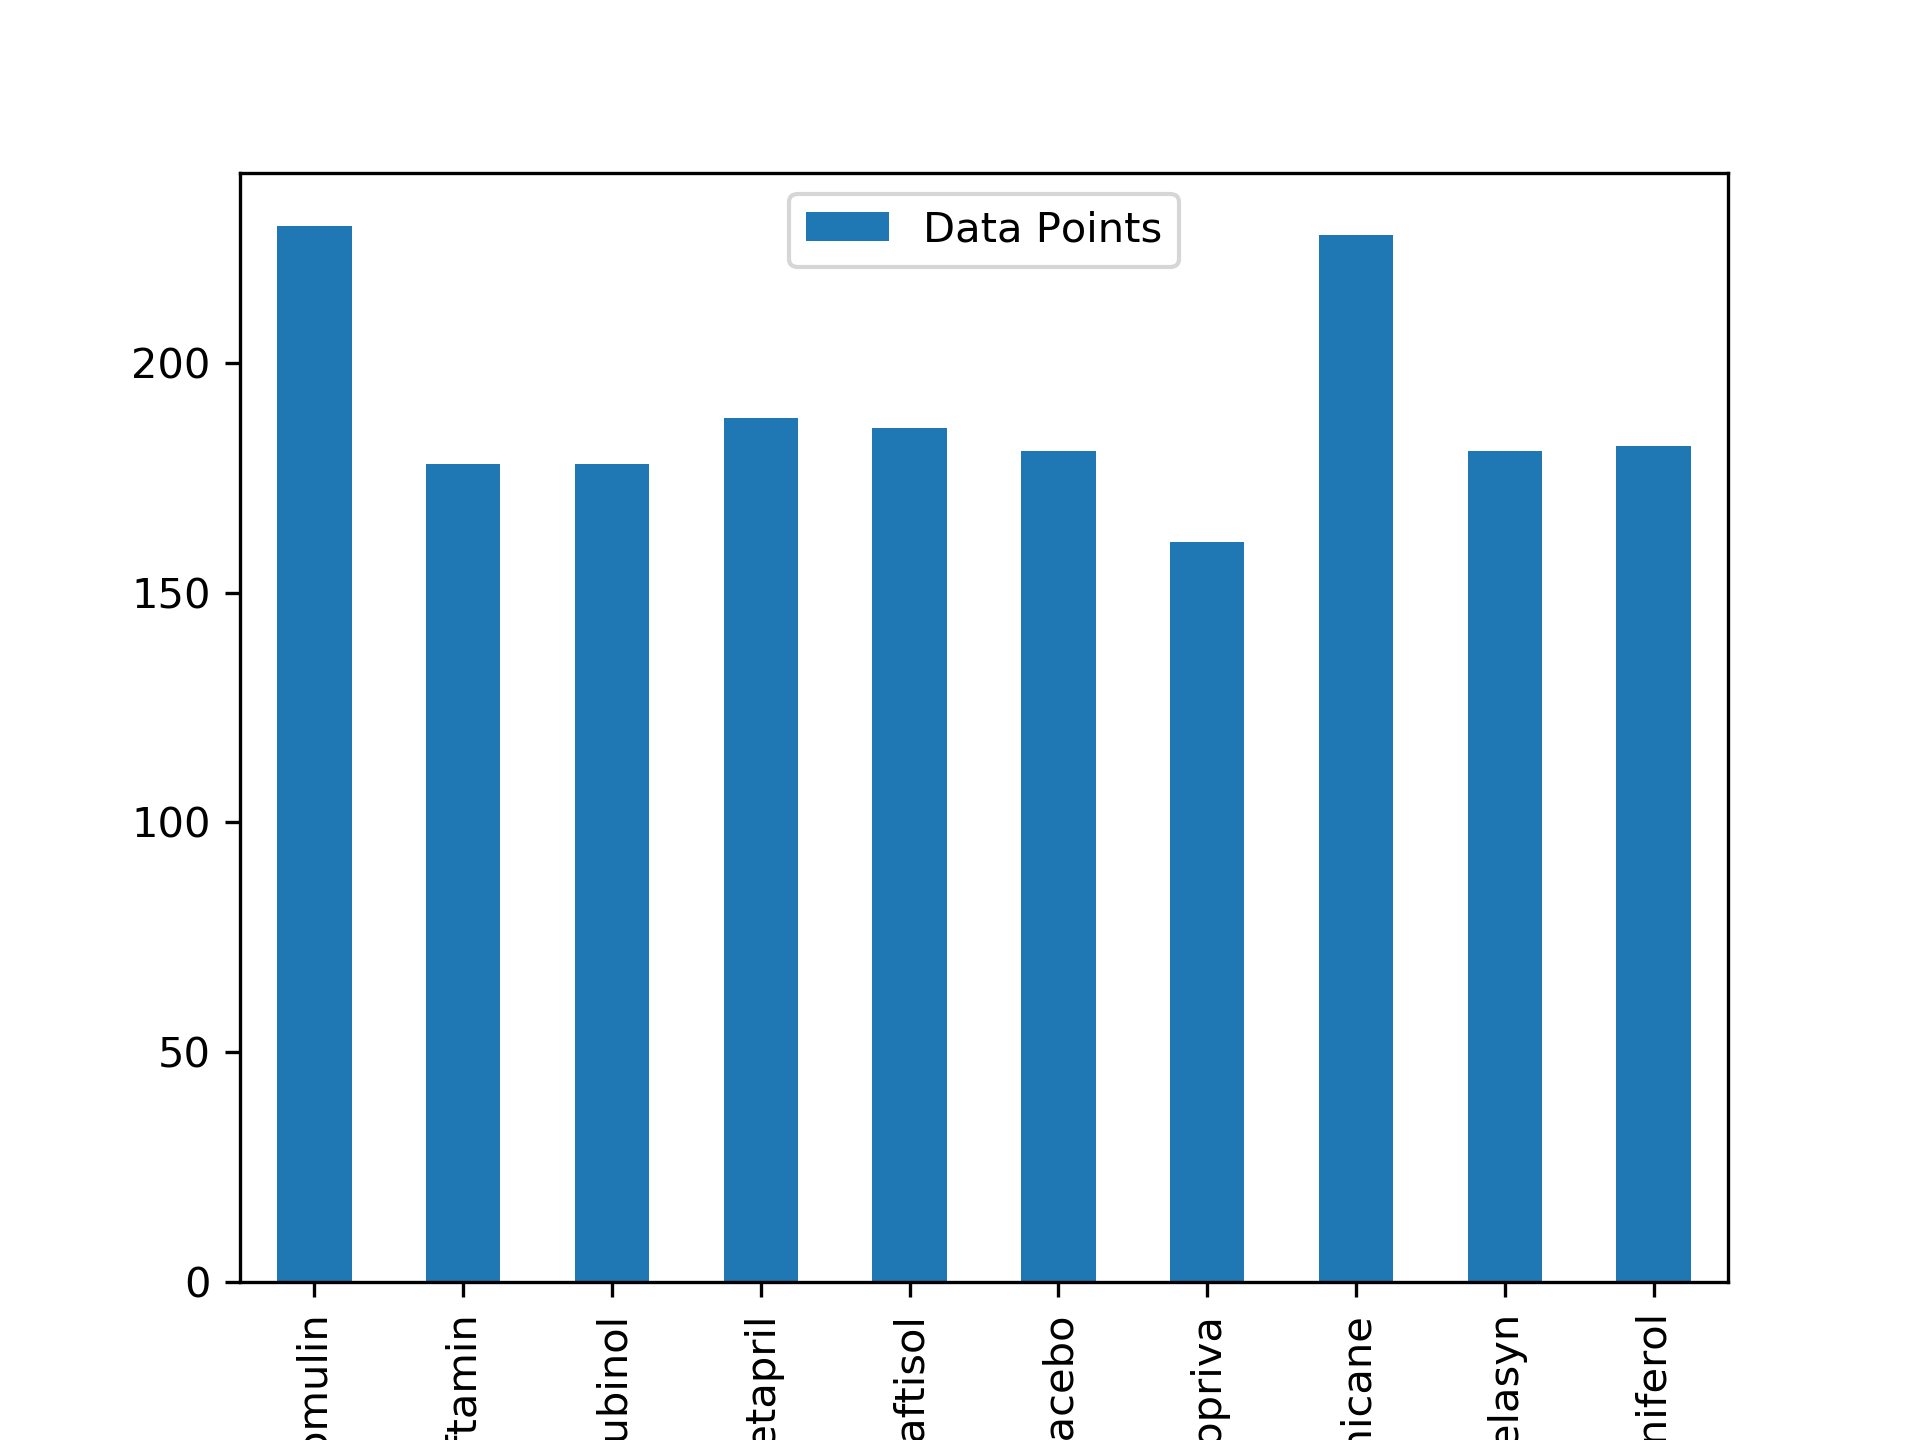

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_count= mouse_data_drug.count()
drug_count= pd.DataFrame(drug_count["Mouse ID"])
drug_count= drug_count.rename(columns={"Mouse ID": "Data Points"})
drug_count
pbar = drug_count.plot.bar(rot=90)
pbar


<IPython.core.display.Javascript object>


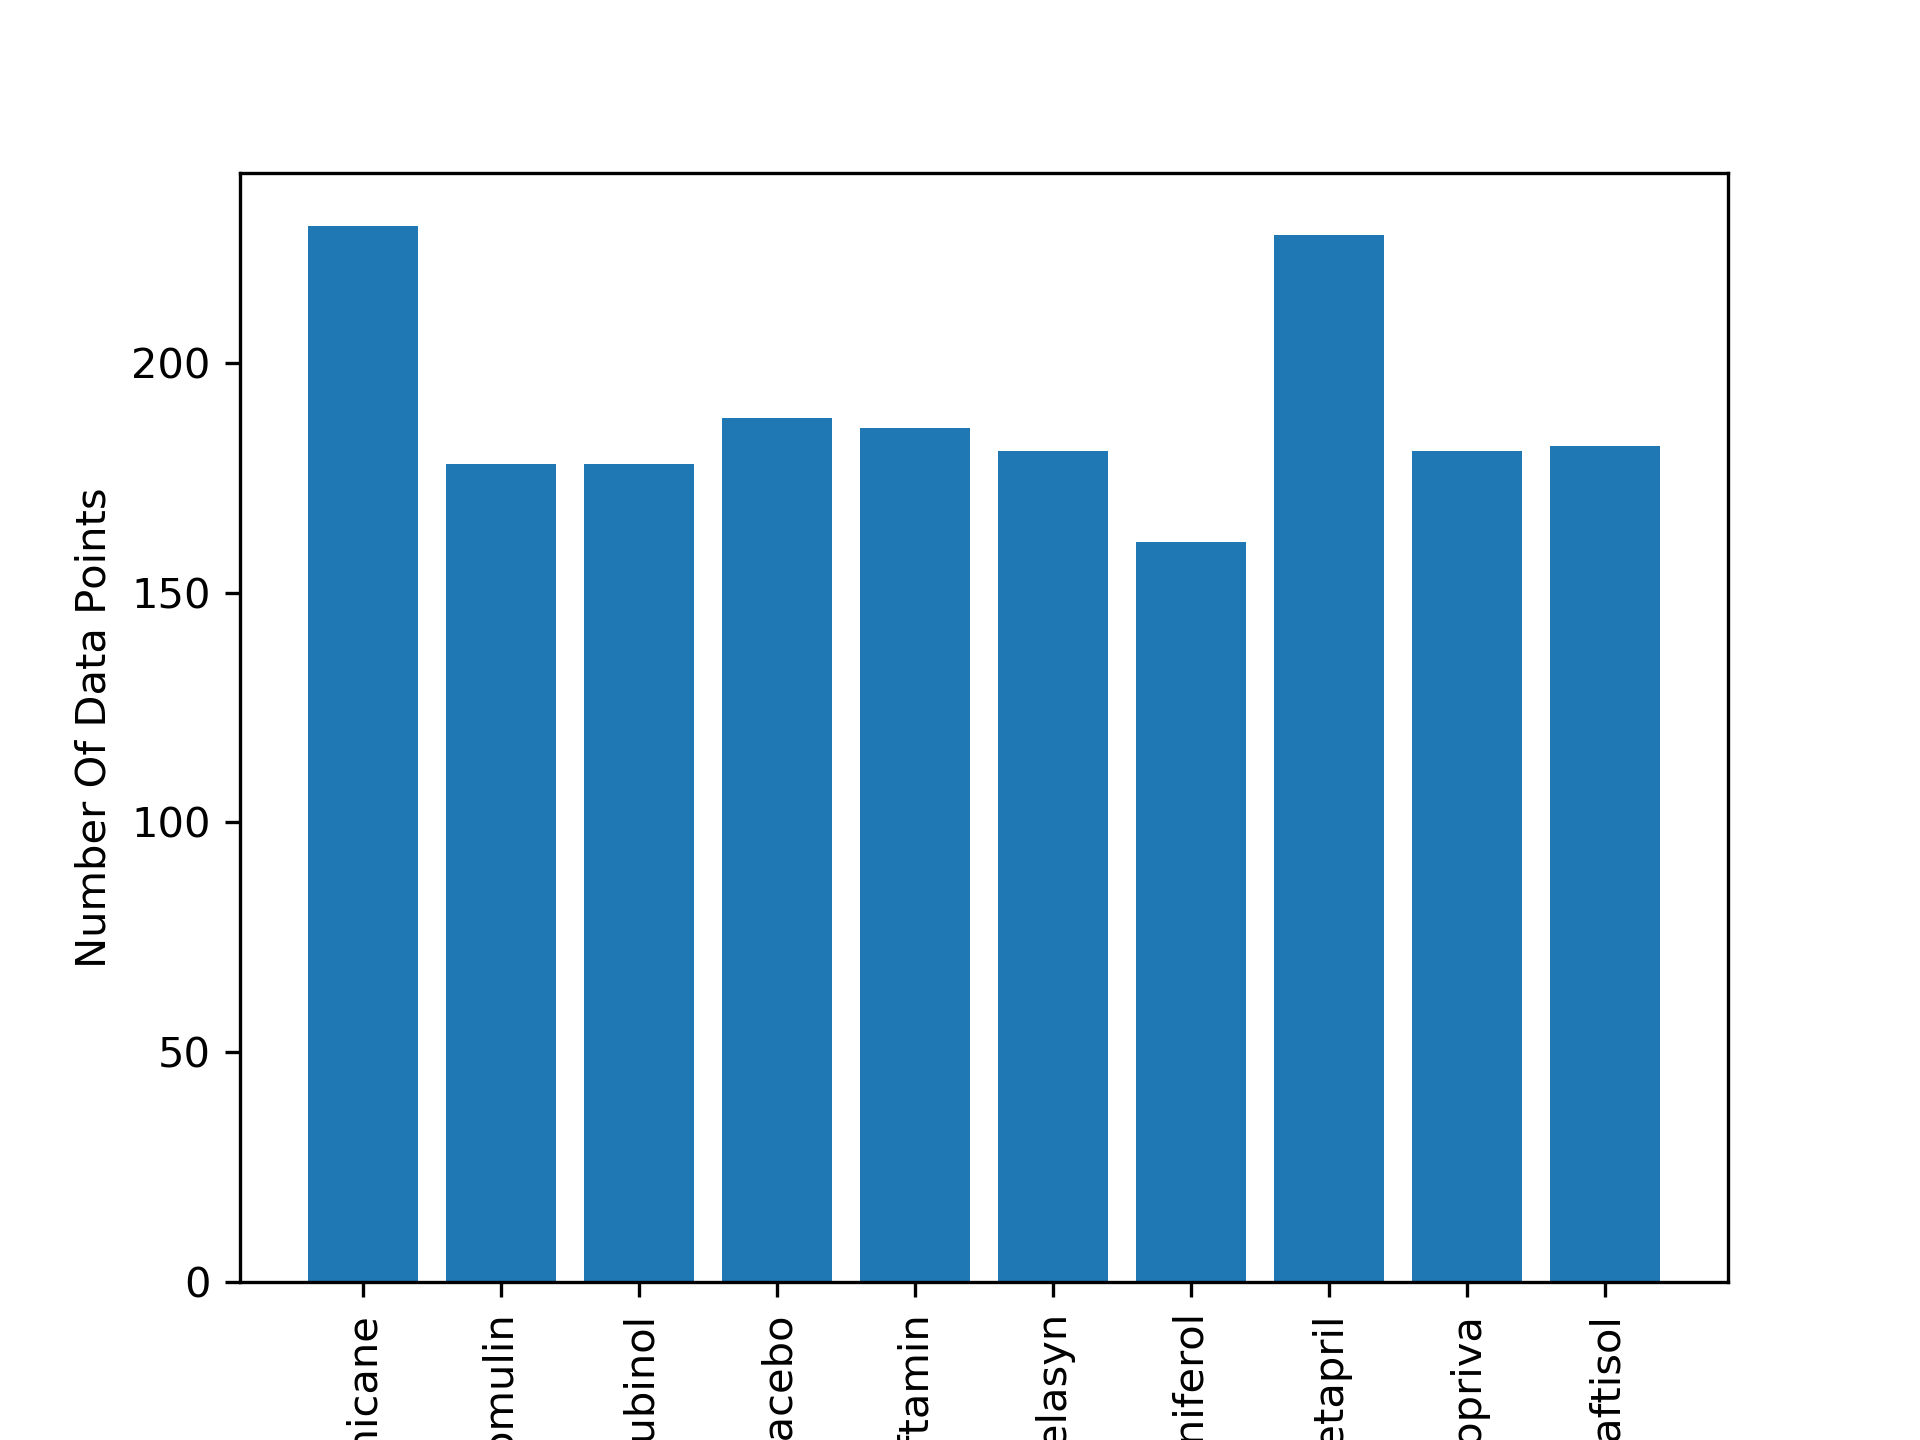

([<matplotlib.axis.XTick at 0x18981552278>,
 <a list of 10 Text xticklabel objects>)

In [4]:
%matplotlib notebook
# Generate a bar plot showing number of data points for each treatment regimen using 

drug_name = mouse_data_complete["Drug Regimen"].unique()

x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]
plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Data Points")

plt.bar(x_axis, drug_count["Data Points"])
plt.xticks(tick_locations, drug_name, rotation="vertical")



## Pie plots

<IPython.core.display.Javascript object>


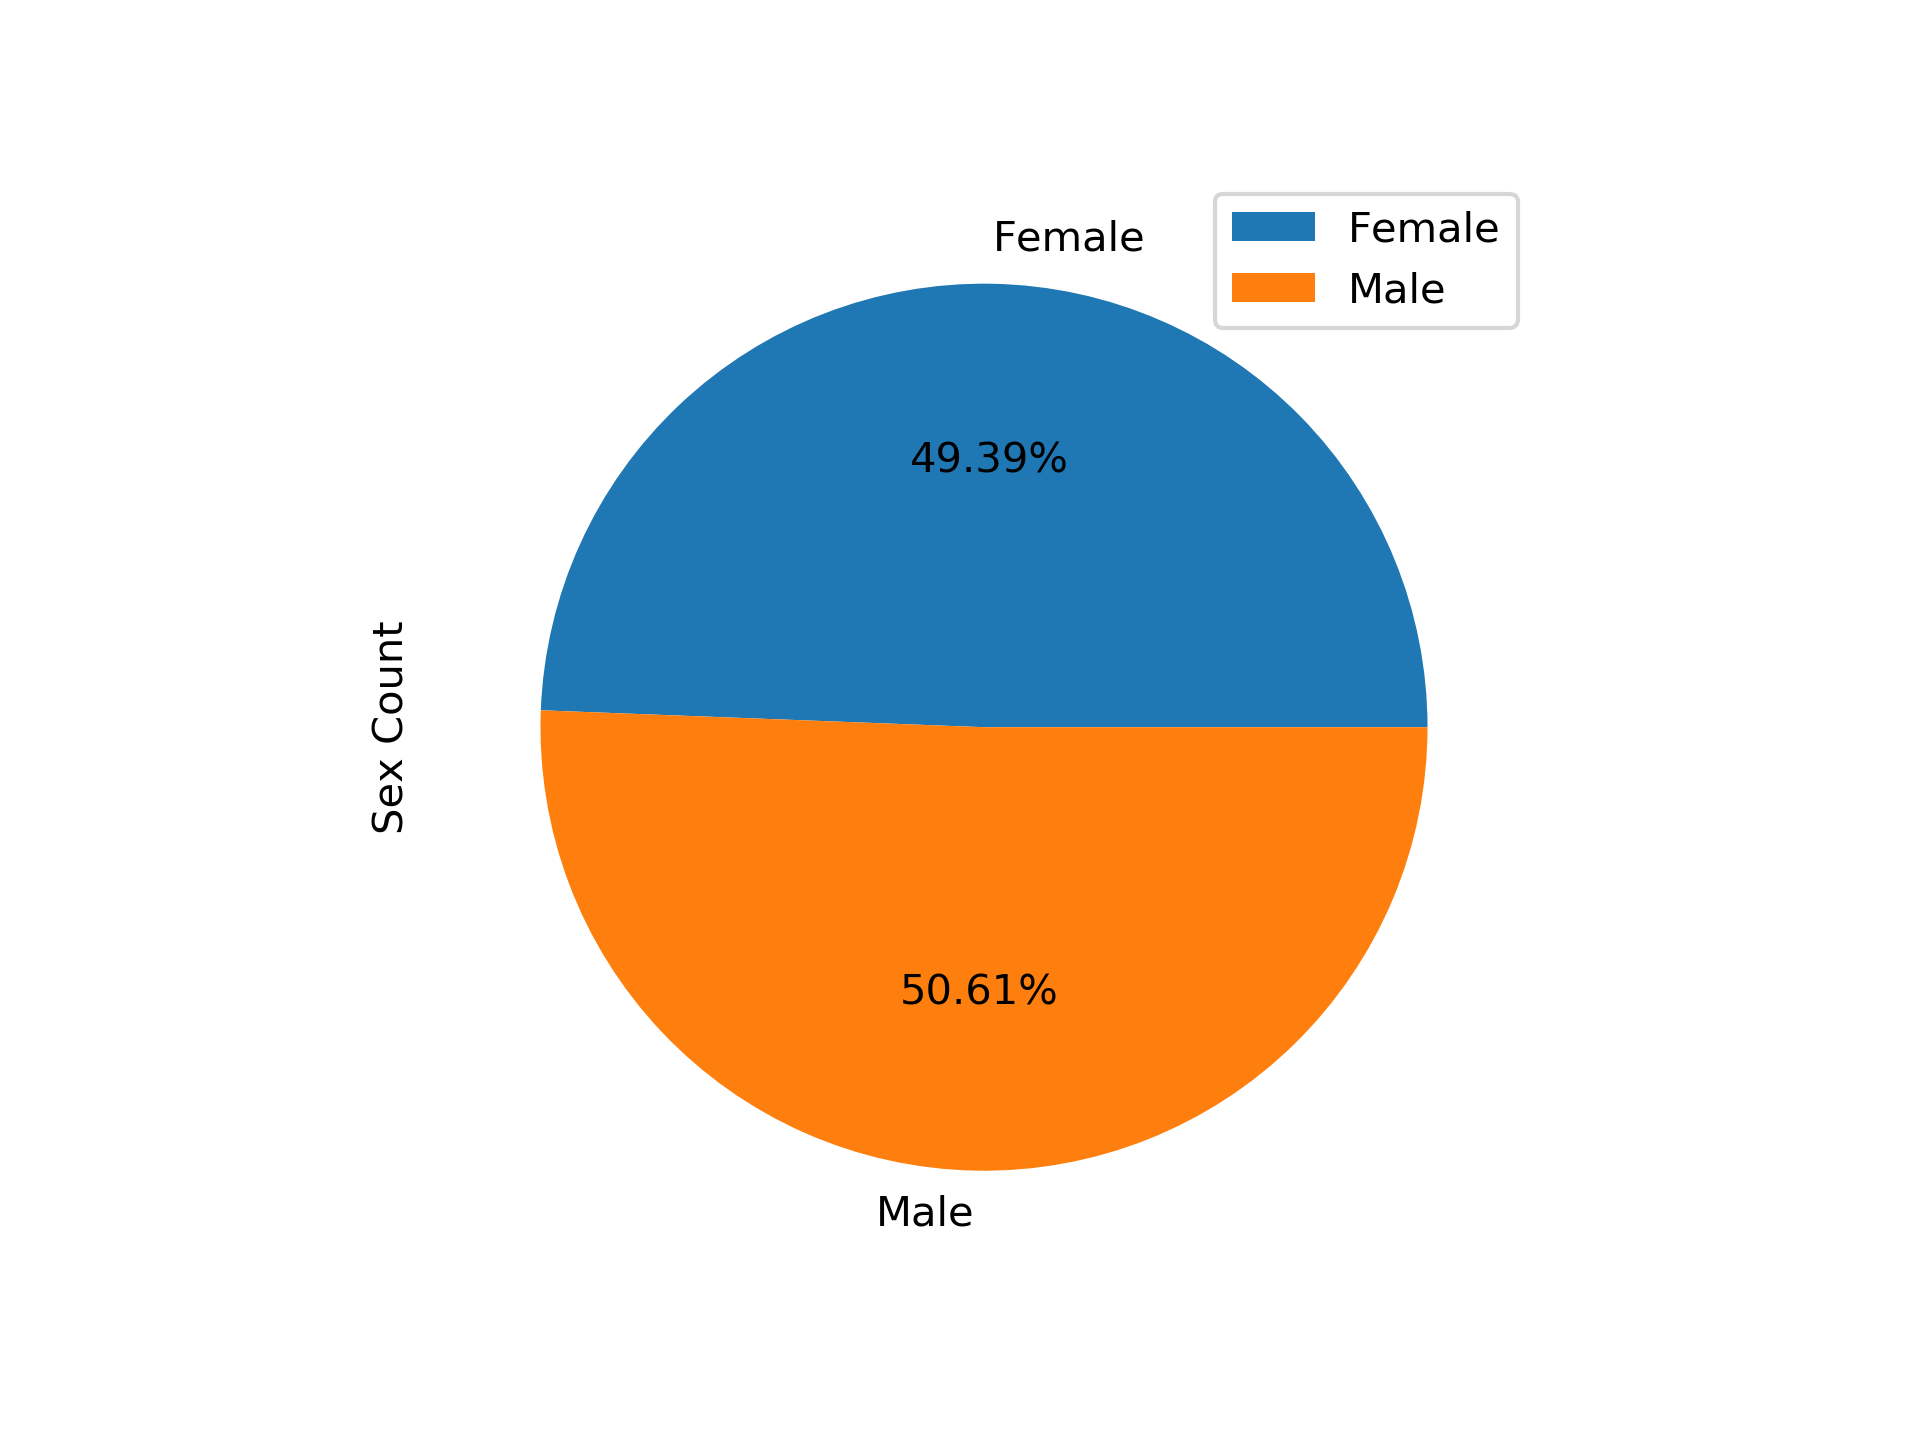

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = mouse_data_complete.groupby(["Sex"]).count()
sex_count = pd.DataFrame(sex_count)
sex_count = sex_count.rename(columns={"Mouse ID" : "Sex Count"})
sexdrop_df = pd.DataFrame(sex_count["Sex Count"])

total_mice = sexdrop_df.sum()
female = "Female"
male = "Male"
sex_f = sexdrop_df.loc[female]
sex_m = sexdrop_df.loc[male]

ppie = sexdrop_df.plot.pie(y="Sex Count", autopct=('%1.2f%%'))
ppie


<IPython.core.display.Javascript object>


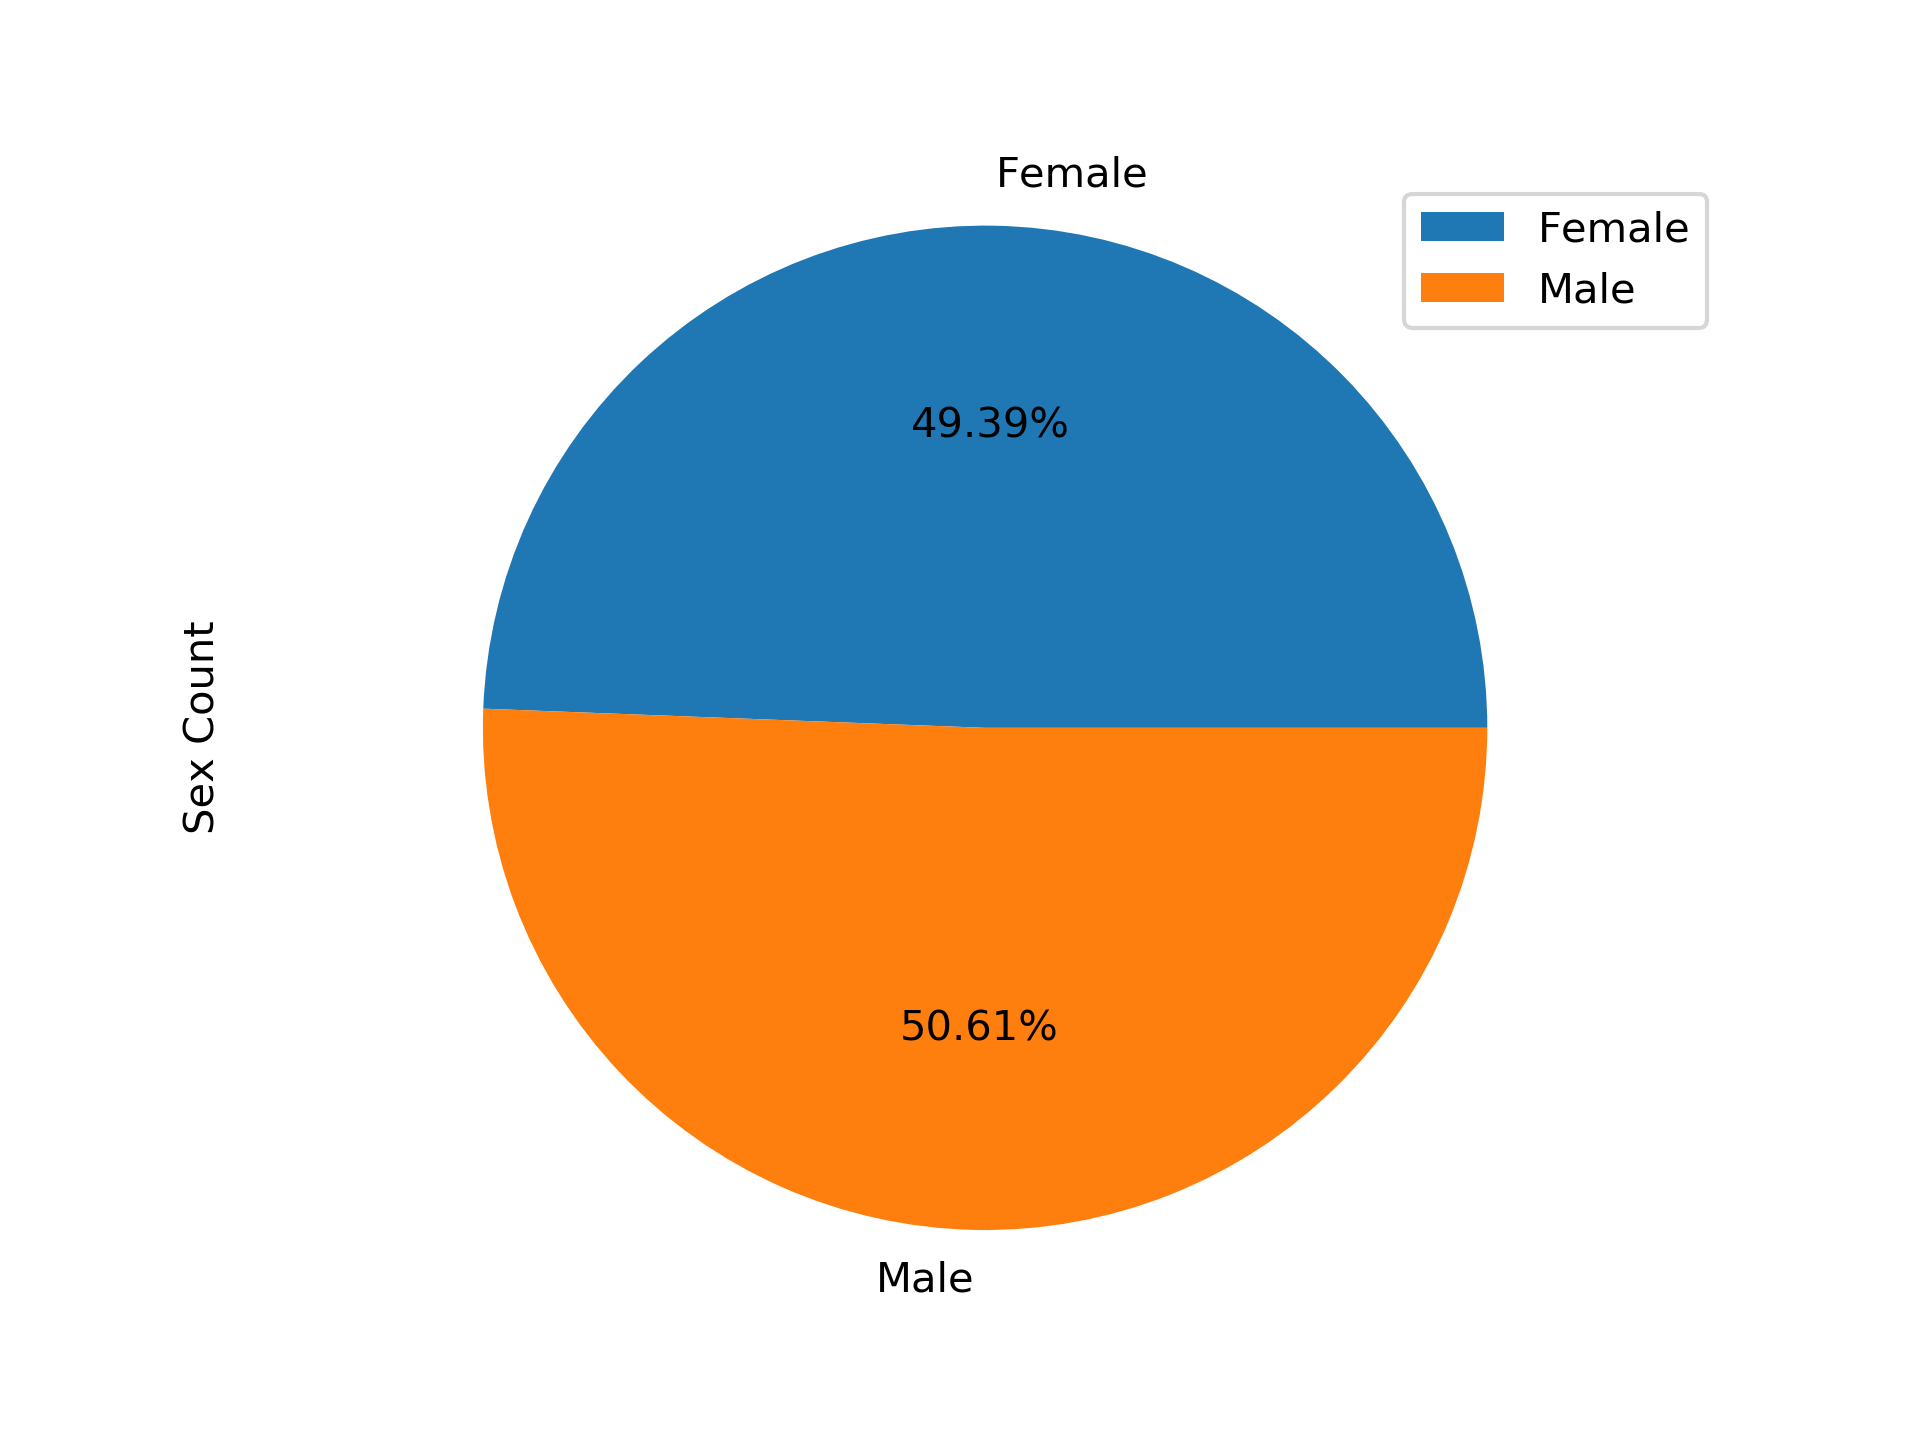

(-1.1045613723658971,
 1.1002172082078998,
 -1.1027130801595115,
 1.105172849624489)

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
sex_count = mouse_data_complete.groupby(["Sex"]).count()
sex_count = pd.DataFrame(sex_count)
sex_count = sex_count.rename(columns={"Mouse ID" : "Sex Count"})
sexdrop_df = pd.DataFrame(sex_count["Sex Count"])

sex_pie = sexdrop_df.plot(kind="pie", y="Sex Count", autopct='%1.2f%%')


plt.show()
plt.axis("equal")
                       

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
final_tumor = mouse_data_complete[["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
final_tumor = final_tumor.loc[final_tumor["Timepoint"] == 45, :]
meantumor = final_tumor.groupby("Drug Regimen").mean()
meantumor.sort_values("Tumor Volume (mm3)")

,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Ramicane,45,34.955595
Capomulin,45,36.236114
Ceftamin,45,64.132421
Infubinol,45,65.755562
Zoniferol,45,65.960888
Propriva,45,66.258529
Placebo,45,68.084082
Stelasyn,45,68.438310
Naftisol,45,69.265506


In [8]:
final_tumor = final_tumor[["Drug Regimen", "Tumor Volume (mm3)"]]
ram = final_tumor.loc[final_tumor["Drug Regimen"] == "Ramicane"]
ram = ram[["Tumor Volume (mm3)"]]
ram


,Tumor Volume (mm3)
9,22.050126
49,29.128472
59,30.276232
74,30.564625
84,30.638696
94,31.560470
114,31.095335
154,33.397653
174,32.978522
184,33.562402


In [9]:
%matplotlib notebook
q_ram = ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq_ram = q_ram[0.25]
uq_ram = q_ram[0.75]
iqr_ram = uq_ram-lq_ram
iqr_ram

lower_bound_ram = lq_ram - (1.5*iqr_ram)
upper_bound_ram = uq_ram + (1.5*iqr_ram)
print(iqr_ram, lower_bound_ram, upper_bound_ram)

outlier_ram = ram.loc[(ram['Tumor Volume (mm3)'] < lower_bound_ram) | (ram['Tumor Volume (mm3)'] > upper_bound_ram)]
oram = outlier_ram["Tumor Volume (mm3)"].count()
print(f"There are {oram} outliers.")


7.527130082499998 19.690480101250003 49.79900043124999
There are 0 outliers.


In [10]:

cap = final_tumor.loc[final_tumor["Drug Regimen"] == "Capomulin"]
cap = cap[["Tumor Volume (mm3)"]]
cap


,Tumor Volume (mm3)
19,23.343598
29,28.484033
39,28.430964
104,31.023923
124,31.896238
134,32.377357
144,33.329098
164,34.455298
204,37.311846
224,36.041047


In [11]:
q_cap = cap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq_cap = q_cap[0.25]
uq_cap = q_cap[0.75]
iqr_cap = uq_cap-lq_cap
iqr_cap

lower_bound_cap = lq_cap - (1.5*iqr_cap)
upper_bound_cap = uq_cap + (1.5*iqr_cap)
print(iqr_cap, lower_bound_cap, upper_bound_cap)

outlier_cap = cap.loc[(cap['Tumor Volume (mm3)'] < lower_bound_cap) | (cap['Tumor Volume (mm3)'] > upper_bound_cap)]
ocap = outlier_cap["Tumor Volume (mm3)"].count()
print(f"There are {ocap} outliers.")


7.781863460000004 20.70456164999999 51.83201549
There are 0 outliers.


In [12]:

cef = final_tumor.loc[final_tumor["Drug Regimen"] == "Ceftamin"]
cef = cef[["Tumor Volume (mm3)"]]
cef


,Tumor Volume (mm3)
493,62.999356
993,61.849023
1033,68.923185
1112,67.748662
1132,59.851956
1162,64.299830
1260,59.741901
1379,61.433892
1670,67.527482
1773,64.634949


In [13]:
q_cef = cef['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq_cef = q_cef[0.25]
uq_cef = q_cef[0.75]
iqr_cef = uq_cef-lq_cef
iqr_cef

lower_bound_cef = lq_cef - (1.5*iqr_cef)
upper_bound_cef = uq_cef + (1.5*iqr_cef)
print(iqr_cef, lower_bound_cef, upper_bound_cef)

outlier_cef = cef.loc[(cef['Tumor Volume (mm3)'] < lower_bound_cef) | (cef['Tumor Volume (mm3)'] > upper_bound_cef)]
ocef = outlier_cef["Tumor Volume (mm3)"].count()
print(f"There are {ocef} outliers.")


6.093590140000003 52.29350701999999 76.66786758
There are 0 outliers.


In [14]:

inf = final_tumor.loc[final_tumor["Drug Regimen"] == "Infubinol"]
inf = inf[["Tumor Volume (mm3)"]]
inf



,Tumor Volume (mm3)
463,67.973419
473,65.525743
540,66.083066
637,72.226731
800,62.435404
834,60.918767
1053,66.196912
1813,67.685569
1872,62.754451


In [15]:
q_inf = inf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq_inf = q_inf[0.25]
uq_inf = q_inf[0.75]
iqr_inf = uq_inf-lq_inf
iqr_inf

lower_bound_inf = lq_inf - (1.5*iqr_inf)
upper_bound_inf = uq_inf + (1.5*iqr_inf)
print(iqr_inf, lower_bound_inf, upper_bound_inf)

outlier_inf = inf.loc[(inf['Tumor Volume (mm3)'] < lower_bound_inf) | (inf['Tumor Volume (mm3)'] > upper_bound_inf)]
oinf = outlier_inf["Tumor Volume (mm3)"].count()
print(f"There are {oinf} outliers.")

4.9311172099999965 55.35777559500001 75.08224443499999
There are 0 outliers.


##### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

<IPython.core.display.Javascript object>


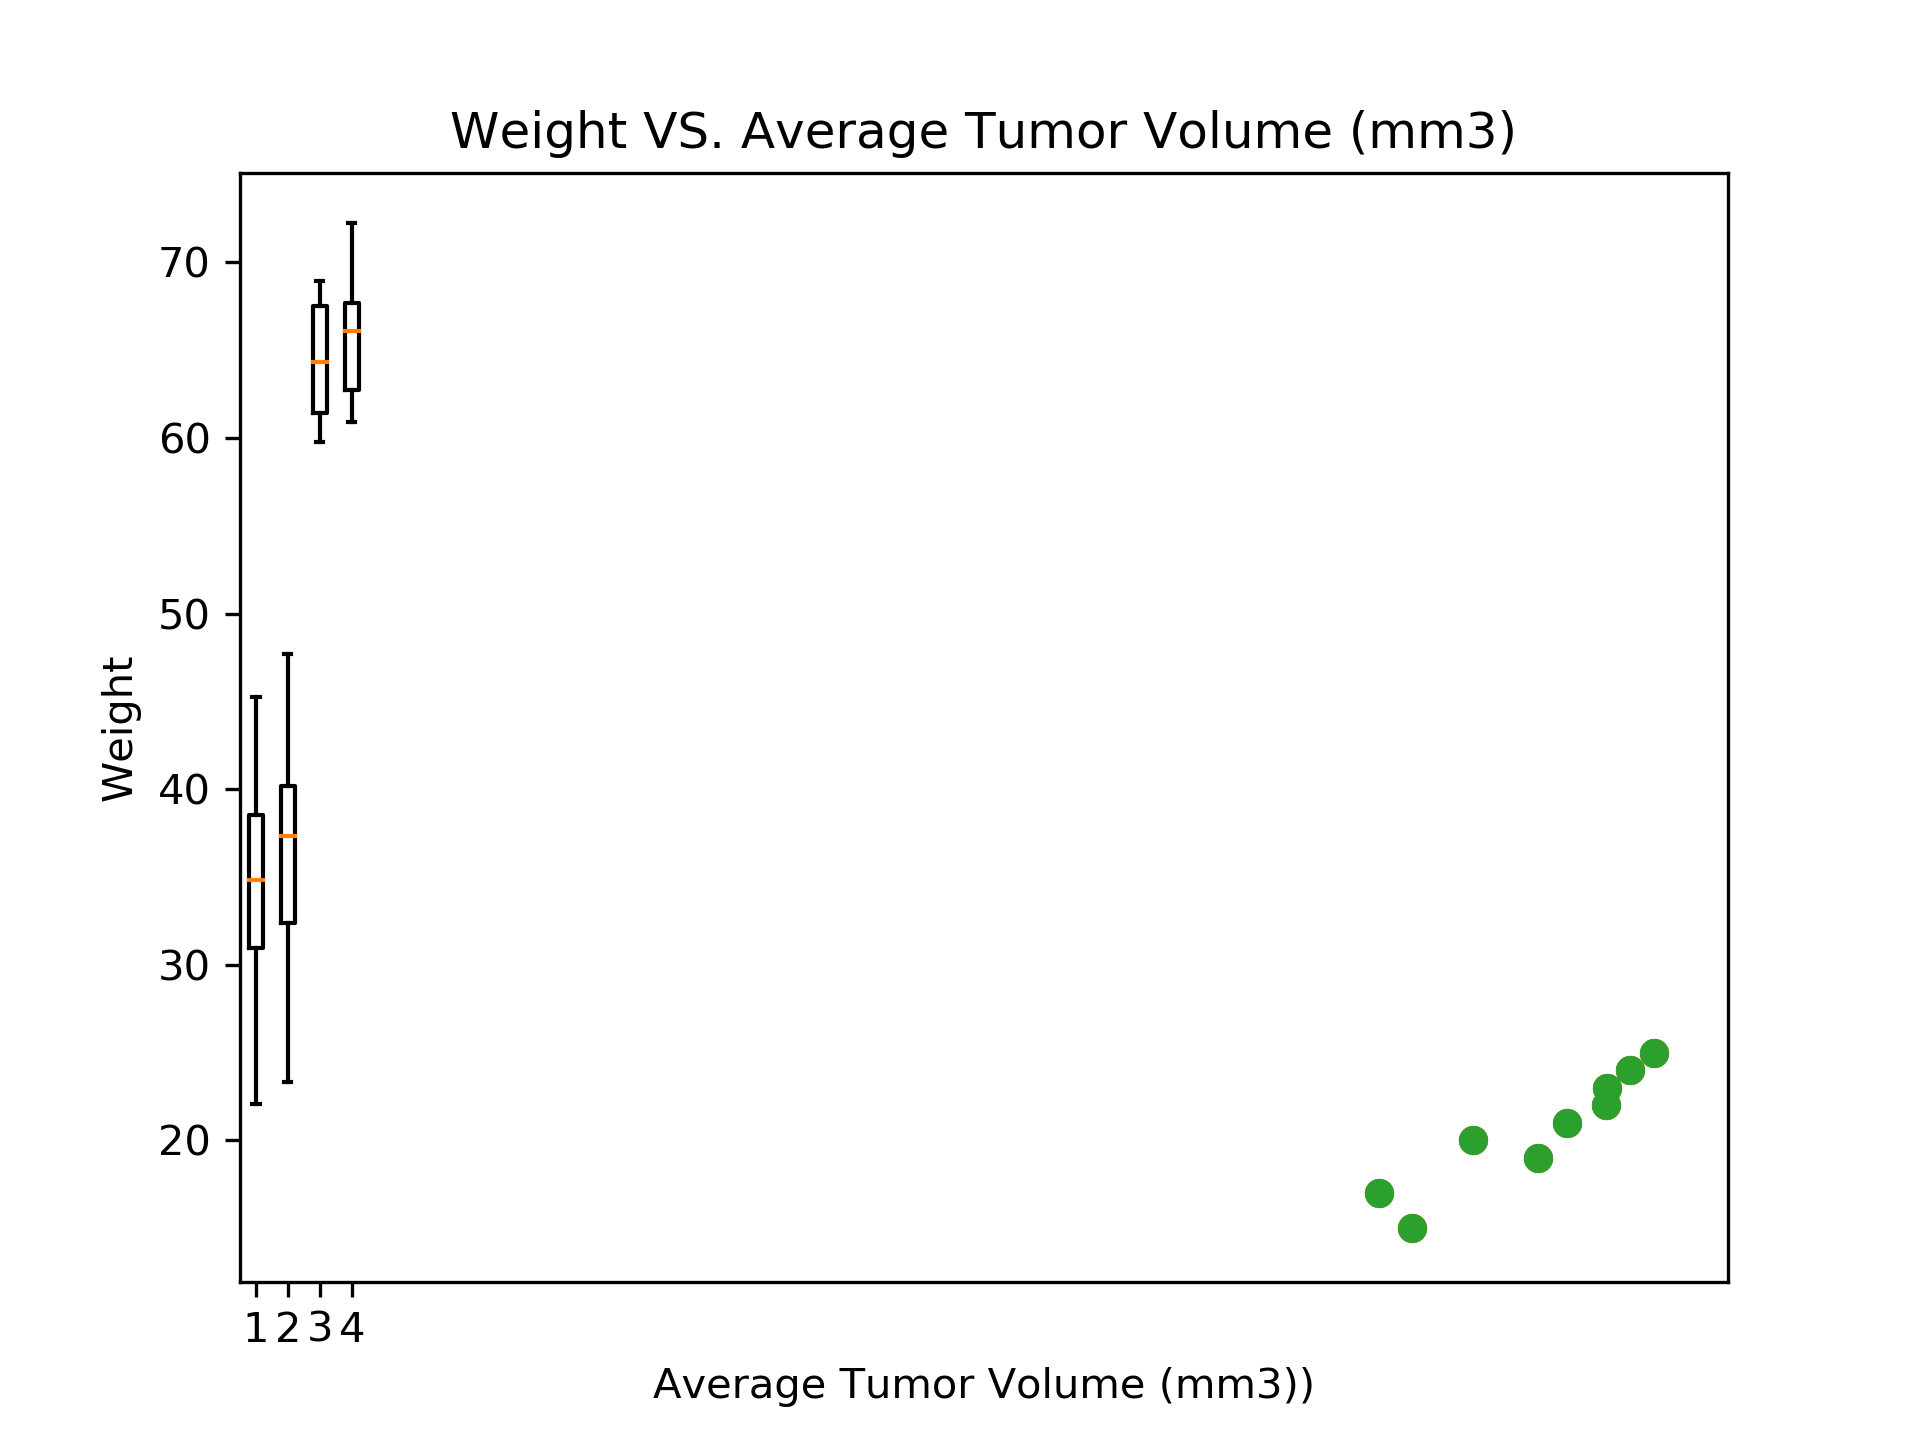

In [67]:
%matplotlib notebook
x = [("Ramicane"), ("Capomulin"), ("Ceftamin"), ("Infubinol")]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel(x)
ram1 = ram["Tumor Volume (mm3)"].tolist()
cap1 = cap["Tumor Volume (mm3)"].tolist()
cef1 = cef["Tumor Volume (mm3)"].tolist()
inf1 = inf["Tumor Volume (mm3)"].tolist()
data1 = (ram1, cap1, cef1, inf1)
ax1.boxplot(data1)
# plt.xlabel(x)
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


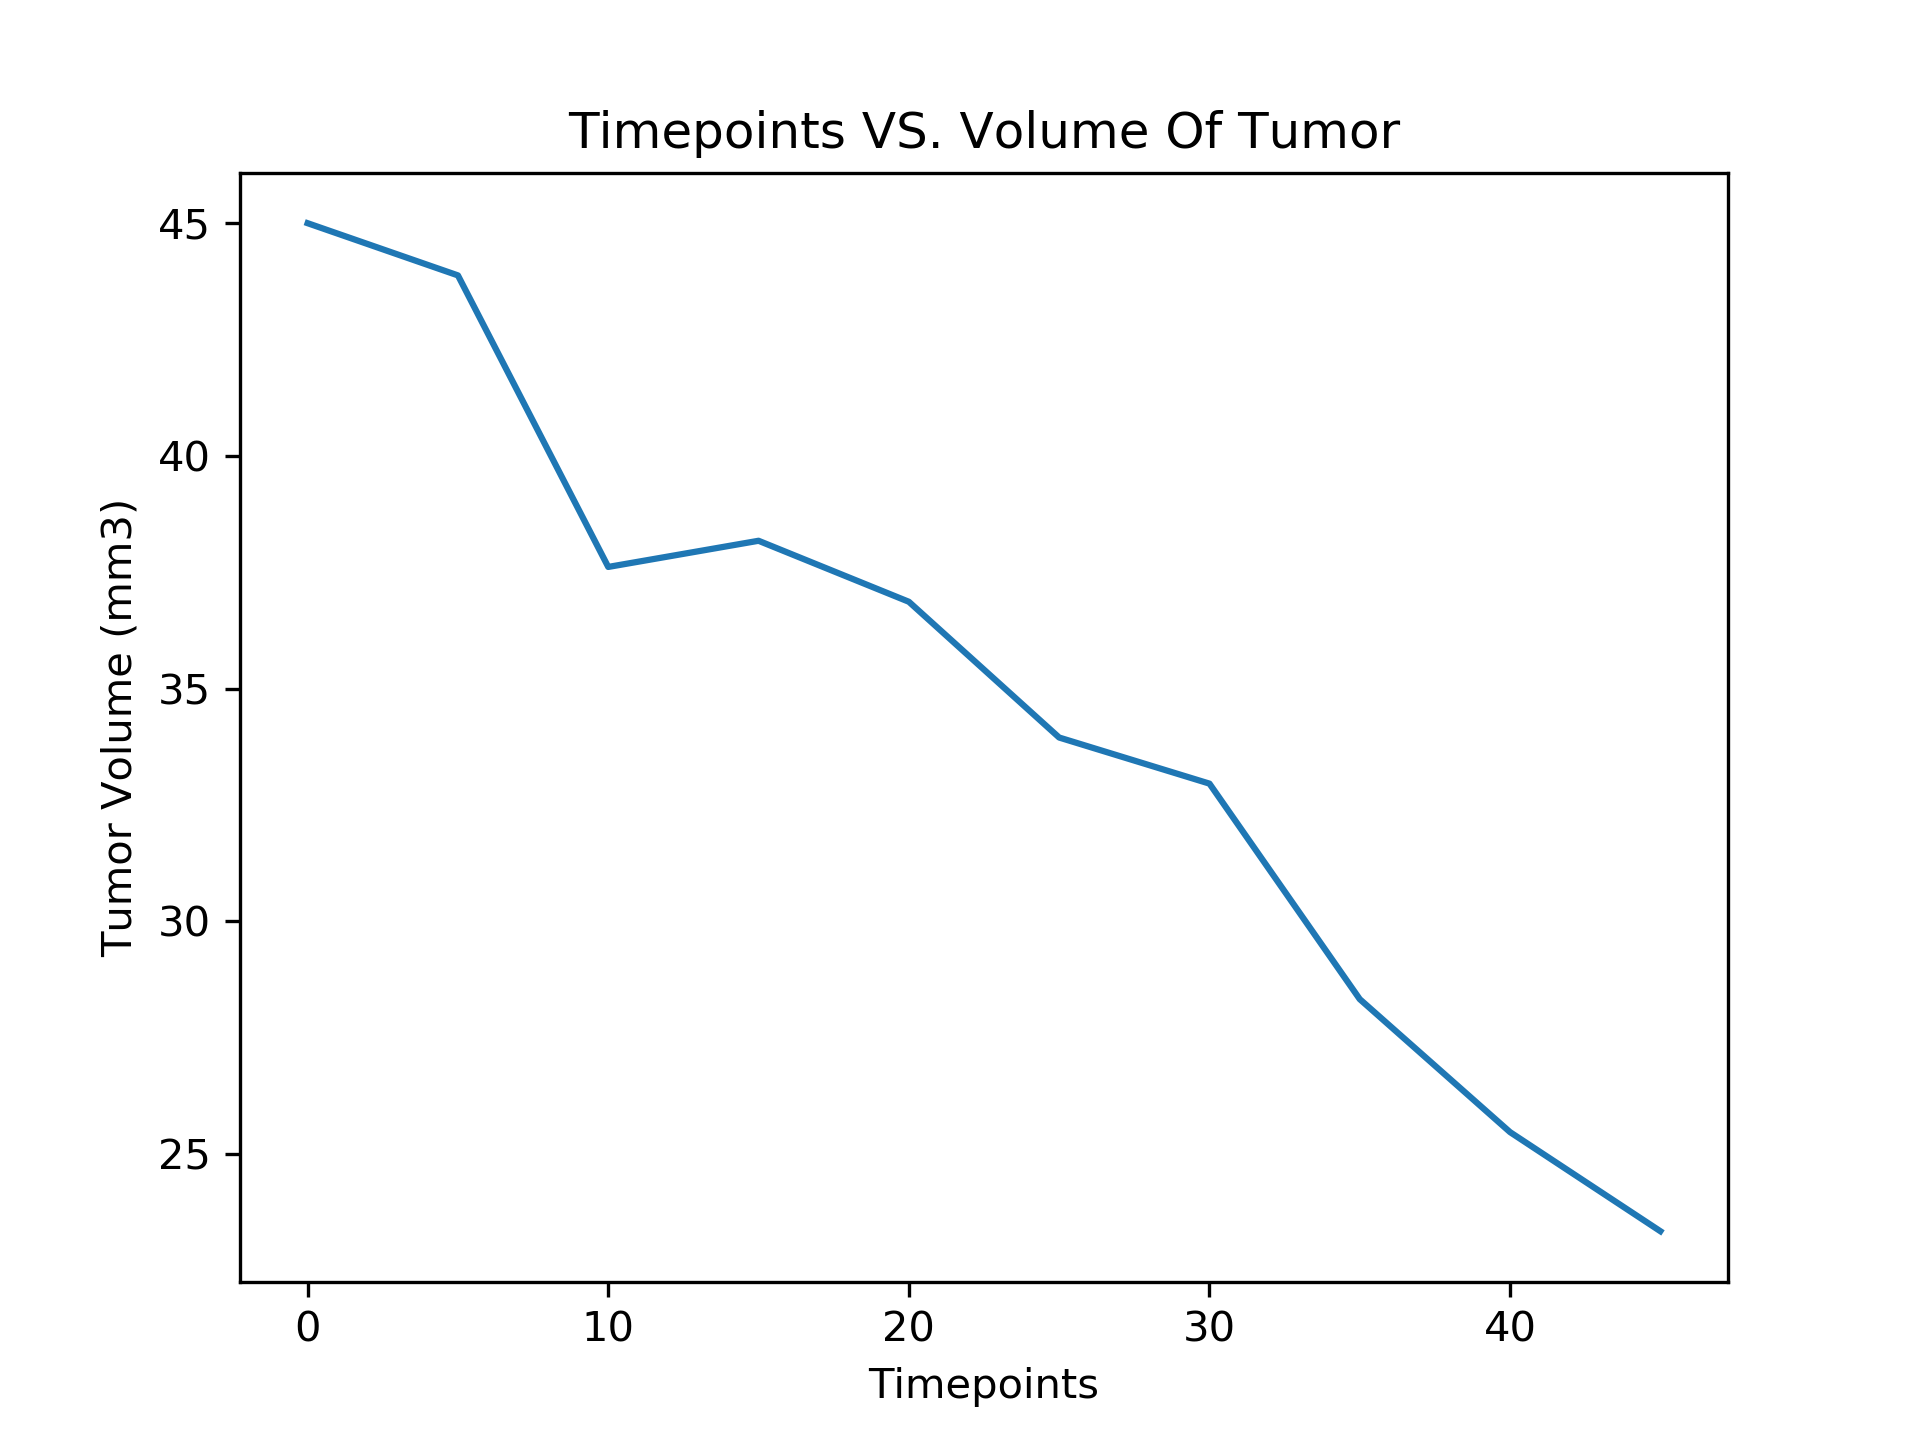

<function matplotlib.pyplot.show(*args, **kw)>

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
%matplotlib notebook
time = mouse_data_complete[["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
cap_time = time.loc[time["Drug Regimen"] == "Capomulin"]
cap_mouse = cap_time[:10]
capv = cap_mouse["Tumor Volume (mm3)"]
capv
x_axis_time = np.arange(0,49,5)
plt.plot(x_axis_time, capv)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoints VS. Volume Of Tumor")
plt.show

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight = mouse_data_complete[["Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
weight = weight.loc[weight["Drug Regimen"] == "Capomulin"]
w= weight["Weight (g)"]
avg_tumor_vsw = weight.groupby(["Weight (g)"])
avgt_vsw = pd.DataFrame(avg_tumor_vsw.mean())
avgt_vsw
w = w.unique()
avgt_vsw

,Tumor Volume (mm3)
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109


<IPython.core.display.Javascript object>


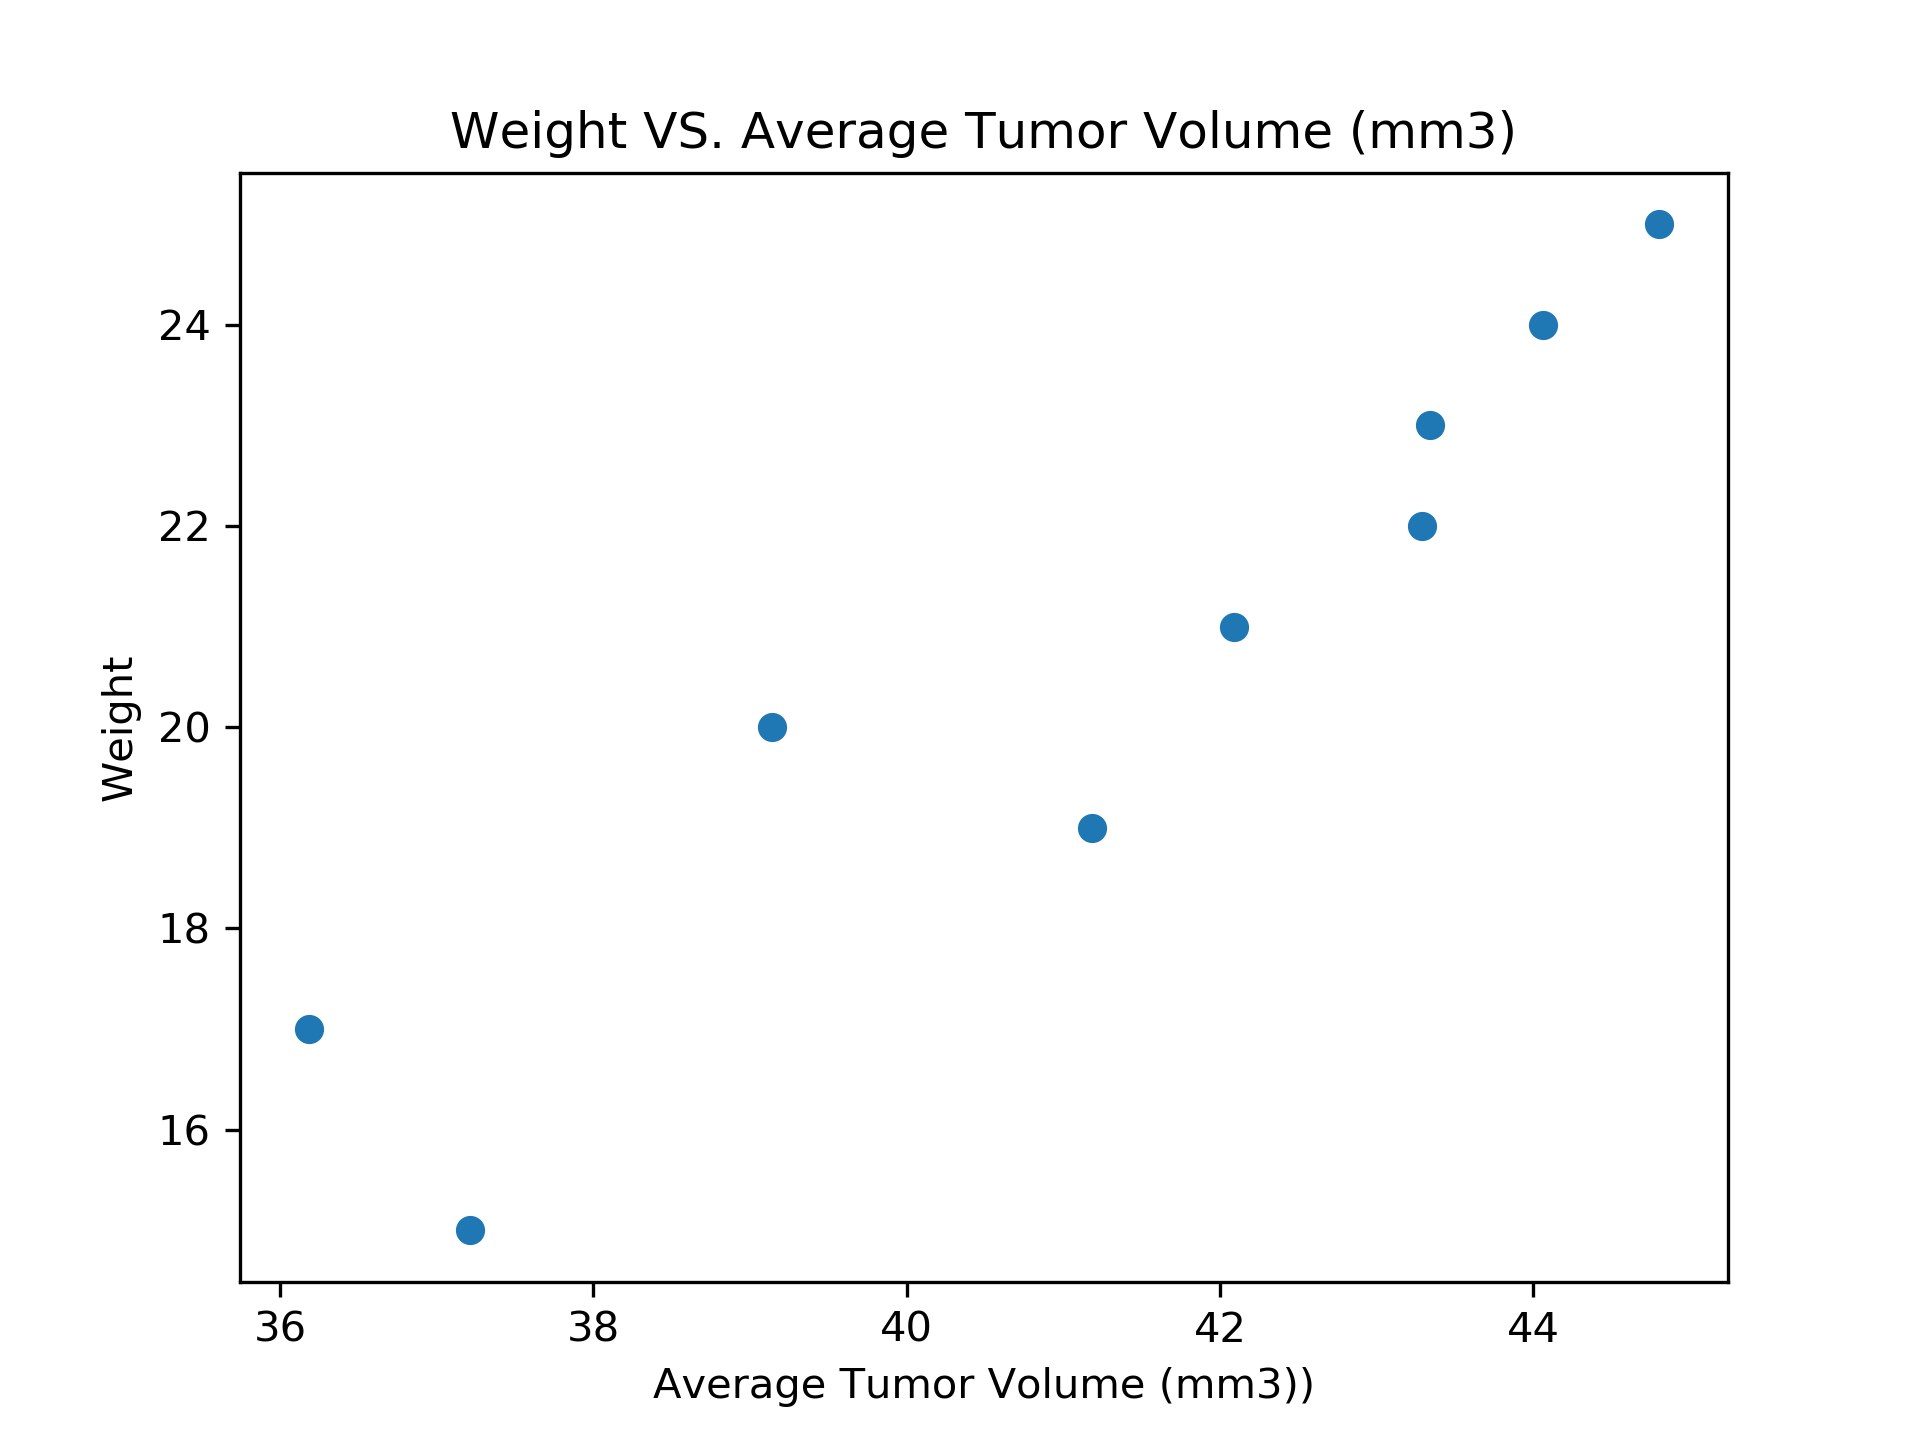

Text(0, 0.5, 'Weight')

In [49]:
%matplotlib notebook

plt.scatter(avgt_vsw, w)
plt.title("Weight VS. Average Tumor Volume (mm3)")
plt.xlabel("Average Tumor Volume (mm3))")
plt.ylabel("Weight")

In [71]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
ttt = avgt_vsw["Tumor Volume (mm3)"]
correlation = round(st.pearsonr(ttt, w)[0],2)
print(f"The correlation coefficient between Mouse Weight and Tumor Weight is {correlation}")


The correlation coefficient between Mouse Weight and Tumor Weight is 0.93


<IPython.core.display.Javascript object>


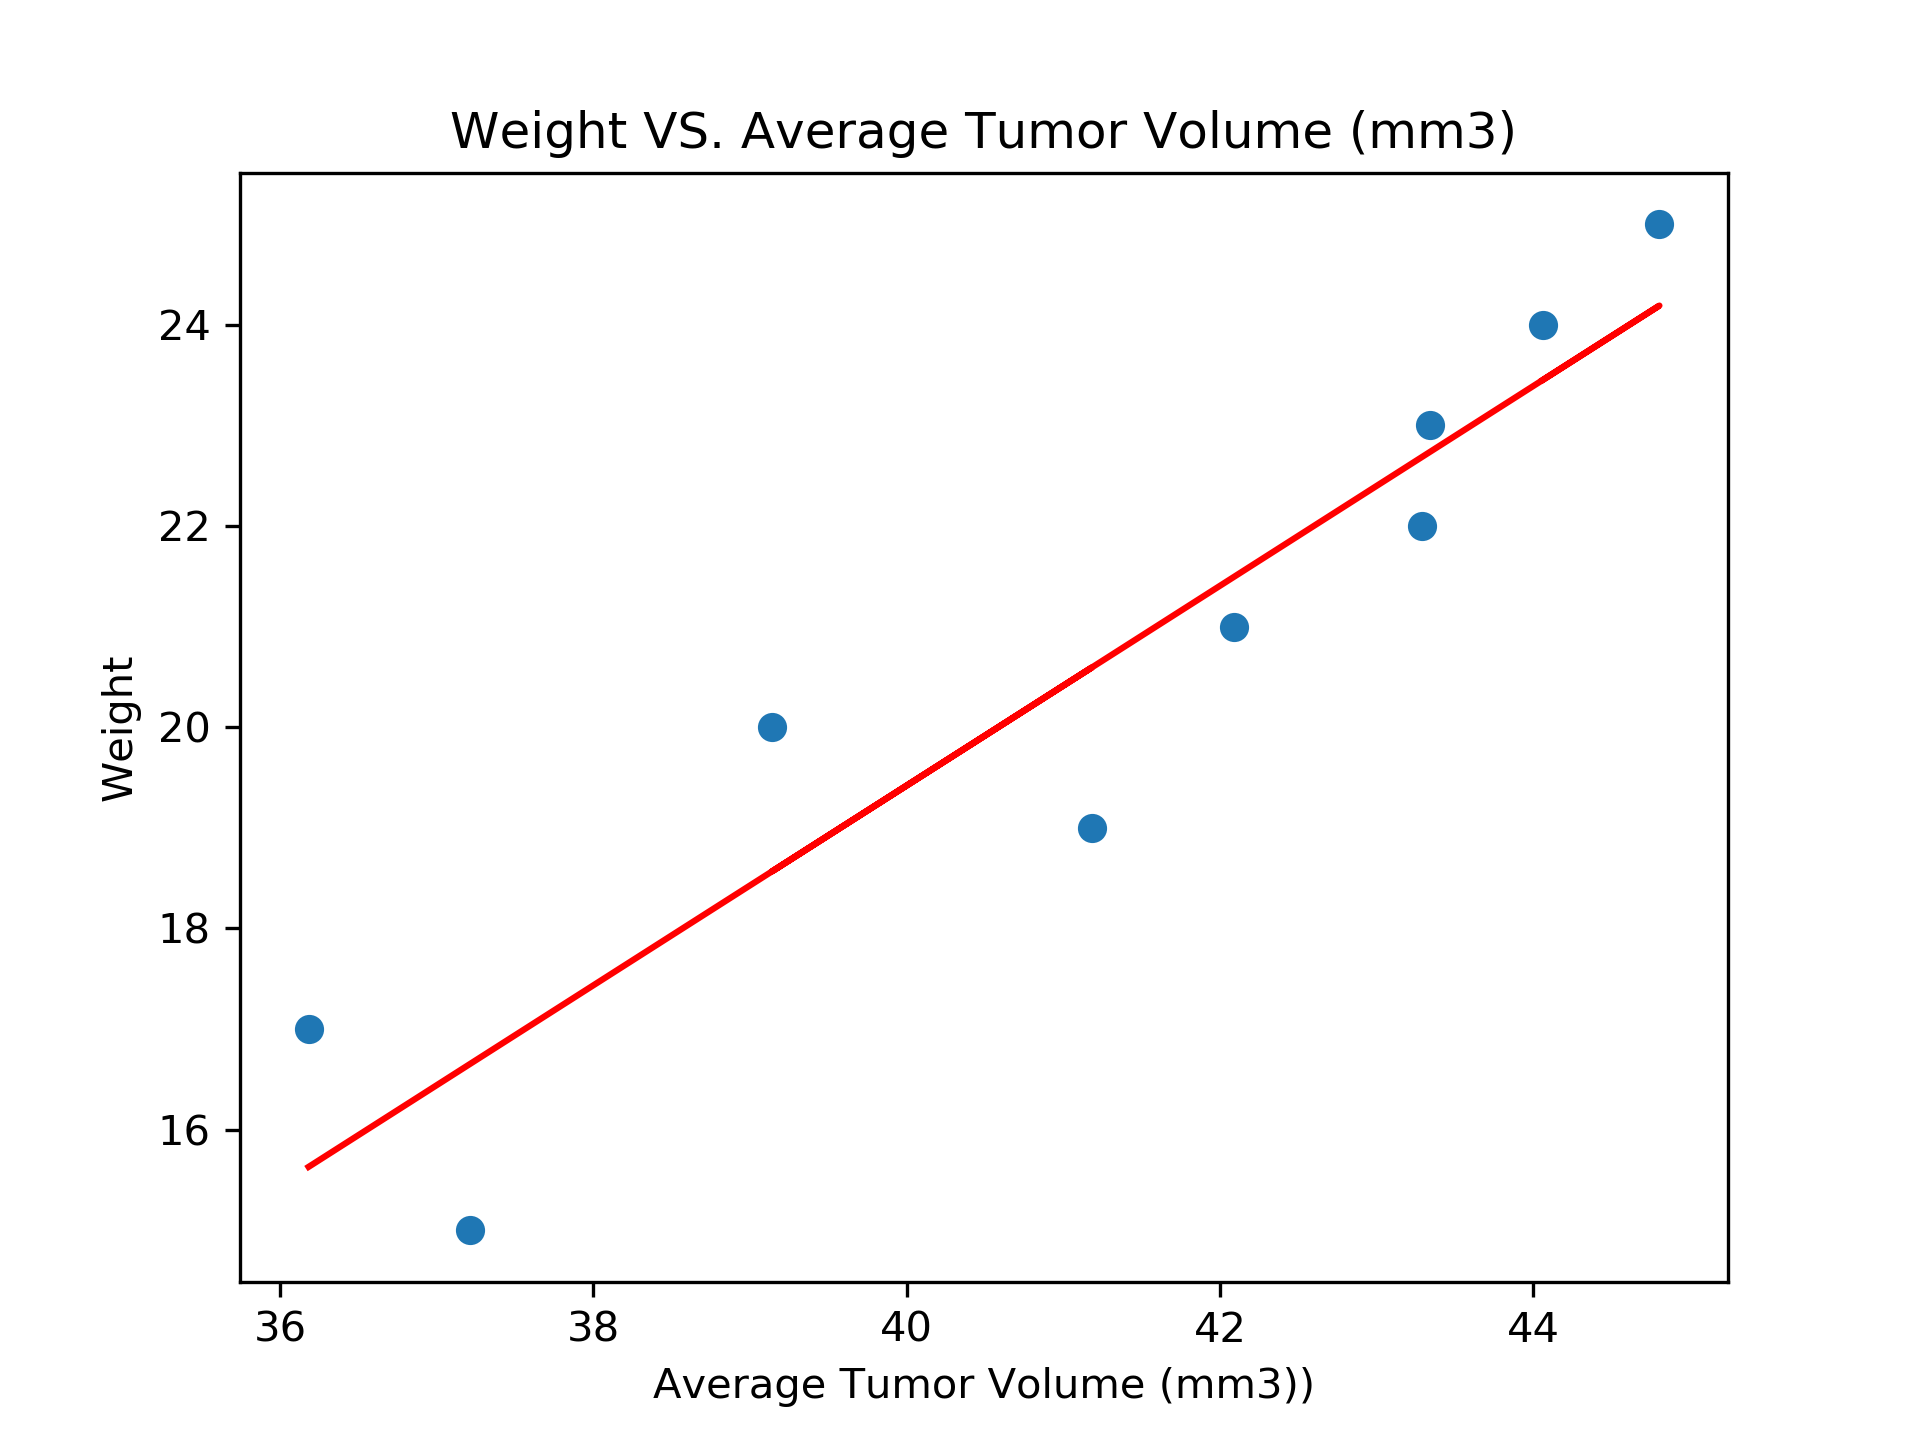

Regression equation is y = 0.99x + -20.28


In [92]:
%matplotlib notebook
from scipy.stats import linregress
plt.scatter(avgt_vsw, w)
plt.title("Weight VS. Average Tumor Volume (mm3)")
plt.xlabel("Average Tumor Volume (mm3))")
plt.ylabel("Weight")
(slope, intercept, rvalue, pvalue, stderr) = linregress(ttt, w)
regress_values = ttt * slope + intercept
plt.plot(ttt,regress_values,"r-")
print(f"Regression equation is y = {round(slope,2)}x + {round(intercept,2)}")

